In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
class IndexTracker:
    def __init__(self, ax, X, slice_axis=-2):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')
        self.slice_axis = slice_axis
        self.X = X
        self.slice_count = X.shape[self.slice_axis]
        self.ind = self.slice_count//2
        self.slice = [slice(None) for i in X.shape]
        self.slice[self.slice_axis] = self.ind

        self.im = ax.imshow(self.X[tuple(self.slice)])
        self.update()

    def on_scroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slice_count
        else:
            self.ind = (self.ind - 1) % self.slice_count
        self.update()

    def update(self):
        self.slice[self.slice_axis] = self.ind
        self.im.set_data(self.X[tuple(self.slice)])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

In [20]:
#ts = h5py.File("couette_runs/test_run/timeseries/timeseries_s1/timeseries_s1_p0.h5","r")
#df = h5py.File("couette_runs/test_run/checkpoints/checkpoints_s99.h5","r")

ts = h5py.File("couette_runs/test_run/timeseries/timeseries_s1/timeseries_s1_p0.h5","r")
df = h5py.File("couette_runs/test_run/checkpoints/checkpoints_s2.h5","r")

In [13]:
ts.close()

In [14]:
#ts['tasks/KE'].shape

<IPython.core.display.Javascript object>


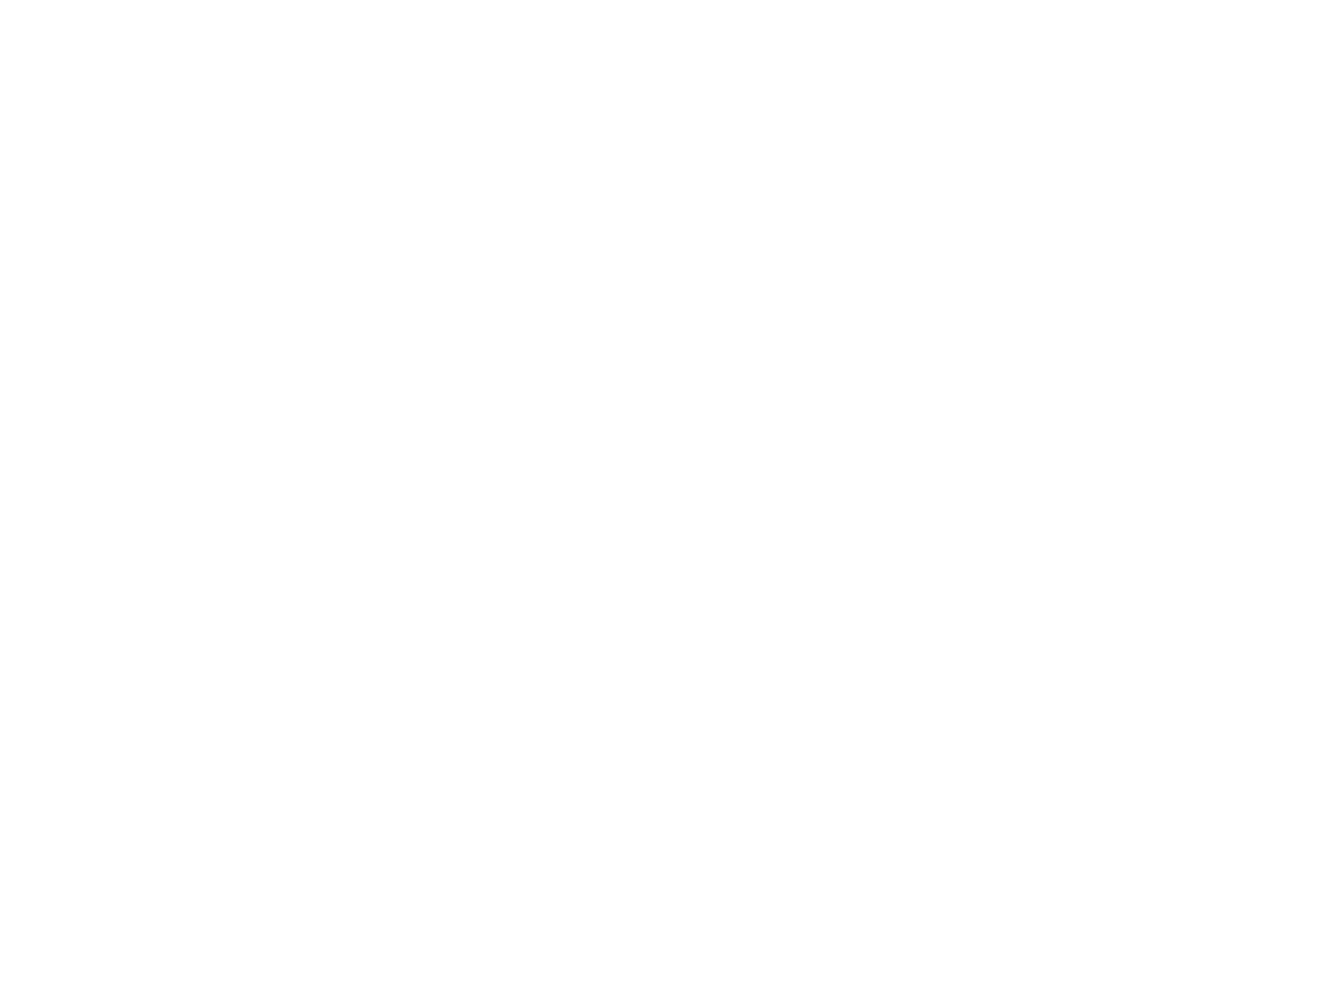

ValueError: Invalid location identifier (invalid location identifier)

In [15]:
plt.figure()
plt.semilogy(ts['scales/sim_time'][:], ts['tasks/KE'][:,0,0,0], label='total KE')
plt.semilogy(ts['scales/sim_time'][:], ts['tasks/KE_pert'][:,0,0,0], label='perturbation KE')
plt.legend()

<IPython.core.display.Javascript object>


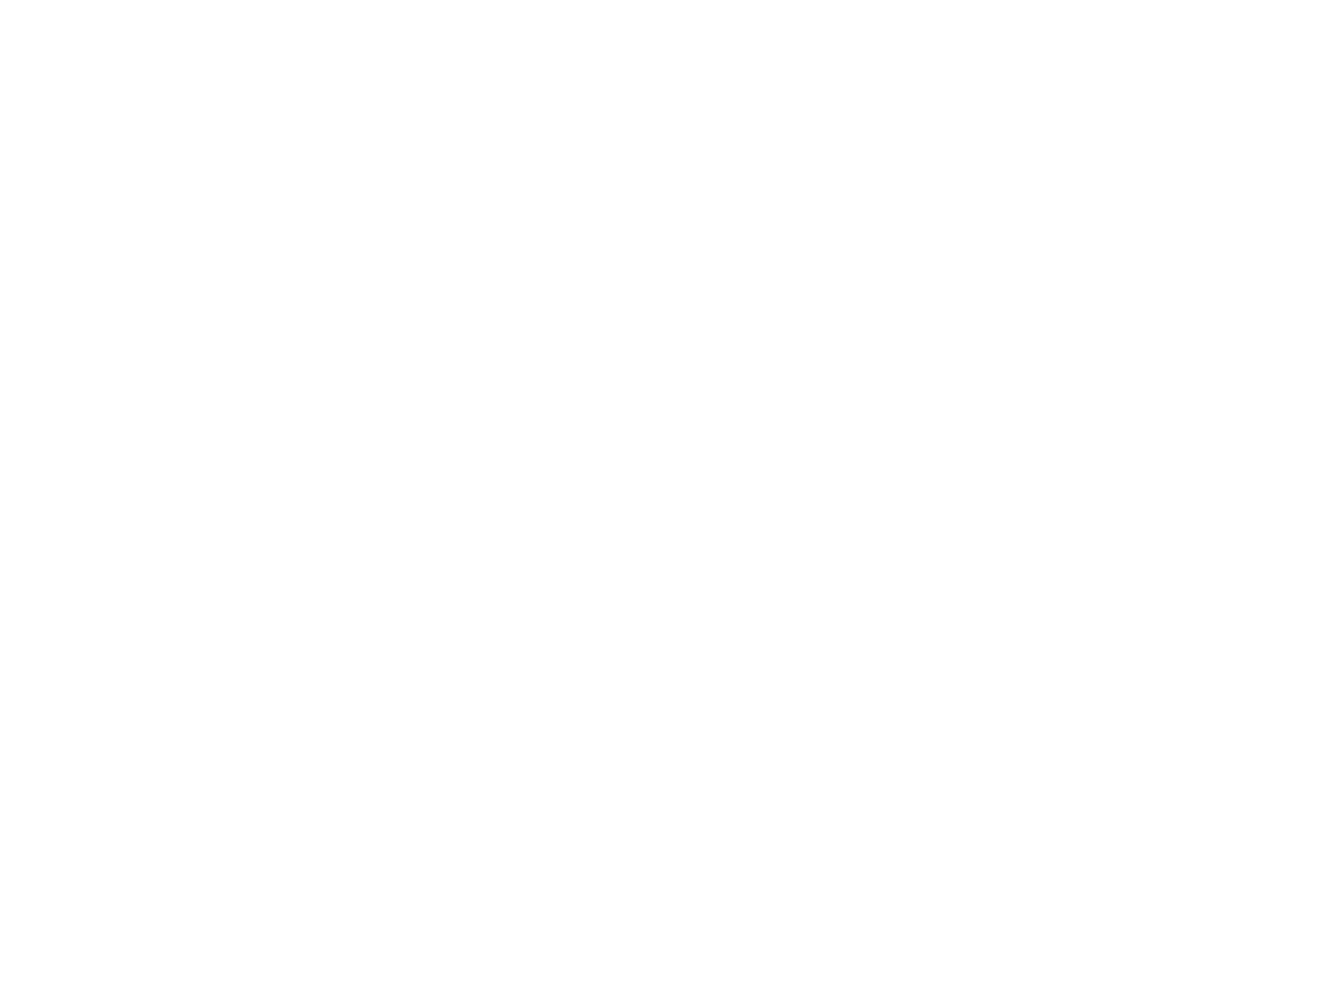

ValueError: Invalid location identifier (invalid location identifier)

In [16]:
plt.figure()
plt.plot(ts['scales/sim_time'][:], ts['tasks/KE'][:,0,0,0], label='total KE')
plt.plot(ts['scales/sim_time'][:], ts['tasks/KE_pert'][:,0,0,0], label='perturbation KE')
plt.legend()

In [21]:
u = df['tasks/u'][:]

In [22]:
df['scales/sim_time'][:]

array([0.0001])

<IPython.core.display.Javascript object>


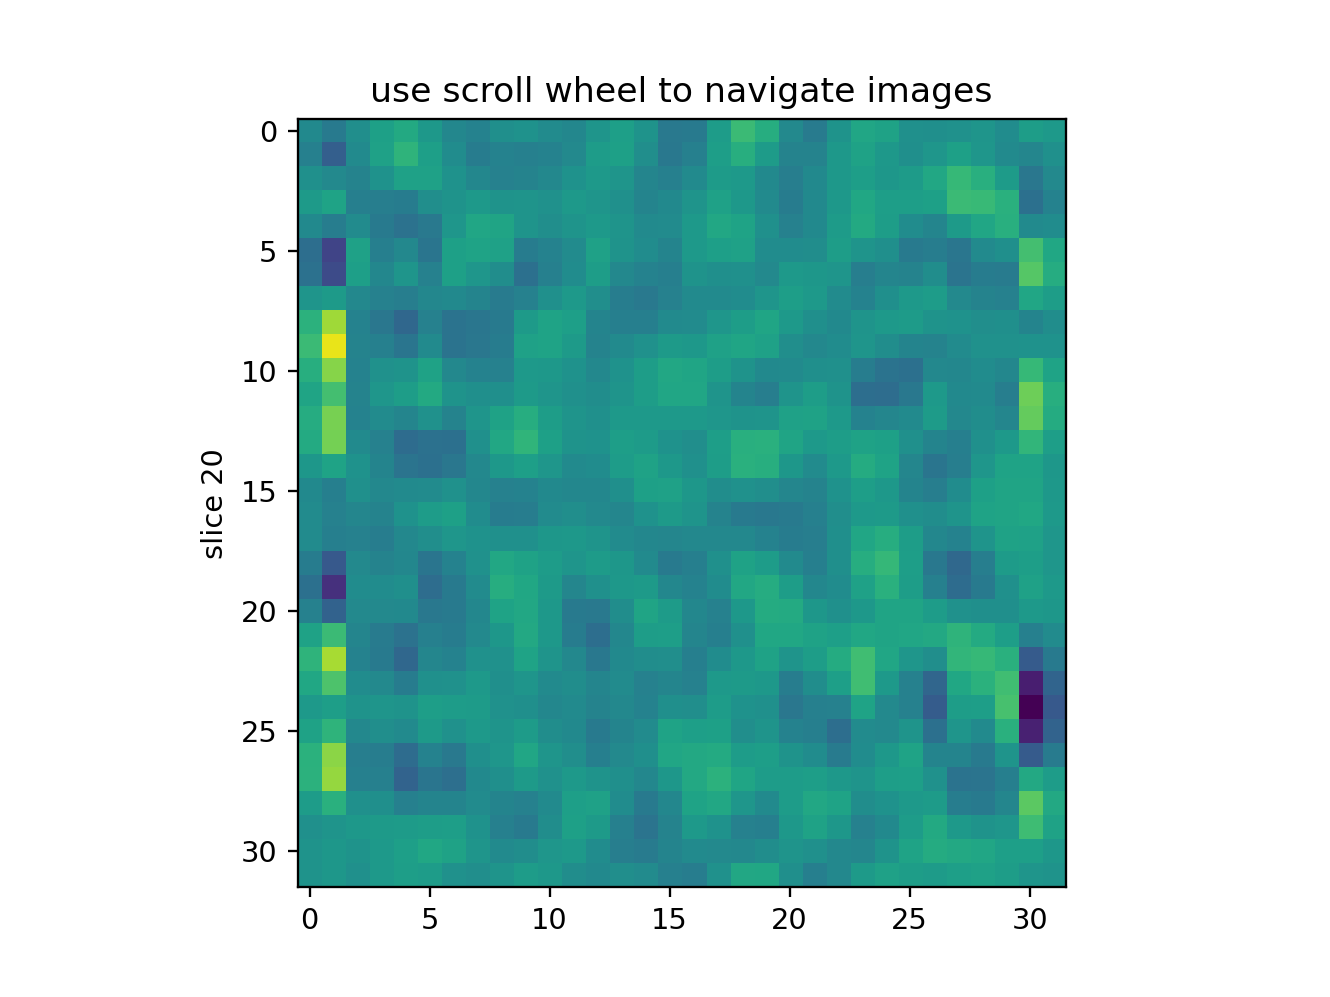

In [23]:
fig, ax = plt.subplots(1, 1)

tracker = IndexTracker(ax, u[0,0])
fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
plt.show()

In [ ]:
df['tasks/u'].attrs.keys()

In [ ]:
z = df['tasks/u'].dims[3][0][:]
Lz = 2

In [ ]:
plt.figure()
plt.plot(z, Lz**2*(z+1)/Lz * (1 - (z+1)/Lz))